In [1]:
import pandas as pd, numpy as np

## Load the question dataset from https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv

In [2]:
# Pull columns that is relevant for analysis
#['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title', 'Body']
include_cols = ['Id', 'OwnerUserId', 'CreationDate','ClosedDate']
exclude_cols = ['Title', 'Body', 'Score']
questions = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv',encoding='ISO-8859-1', usecols=include_cols)


In [3]:
# Find the null columns, Here OwnerUserId has also null values, it means that question is not tagged with any user and 
# which is not possible so drop these records
questions.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
dtype: int64

In [4]:
#dropping rows where OwnerUserId is null
questions = questions[-questions['OwnerUserId'].isnull()]

In [5]:
# Check the data type of every column
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1249762 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1249762 non-null  object 
 3   ClosedDate    55240 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 47.7+ MB


In [6]:
# Correct the data type of OwnerUserId, it should be int
questions['OwnerUserId'] = questions['OwnerUserId'].apply(lambda x: int(x))

In [7]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Id            1249762 non-null  int64 
 1   OwnerUserId   1249762 non-null  int64 
 2   CreationDate  1249762 non-null  object
 3   ClosedDate    55240 non-null    object
dtypes: int64(2), object(2)
memory usage: 47.7+ MB


In [8]:
# Correct the data type of CreationDate
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

In [9]:
# Correct the data type of ClosedDate
questions['ClosedDate'] = pd.to_datetime(questions['ClosedDate'])

In [10]:
# Check if all the data are in Correct Format
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  int64              
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   ClosedDate    55240 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(2)
memory usage: 47.7 MB


In [11]:
# Check if CreationDate is greater than CloseDate, then the record becomes invalid and drop them
questions[questions['CreationDate'] > questions['ClosedDate']]

,Id,OwnerUserId,CreationDate,ClosedDate


## Load the answer dataset from https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv

In [12]:
include_cols = ['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score']
exclude_cols = ['Body']
answers = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv',encoding='ISO-8859-1', usecols=include_cols)

In [13]:
answers

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01T14:45:37Z,90,13
1,124,26.0,2008-08-01T16:09:47Z,80,12
2,199,50.0,2008-08-01T19:36:46Z,180,1
3,269,91.0,2008-08-01T23:49:57Z,260,4
4,307,49.0,2008-08-02T01:49:46Z,260,28
...,...,...,...,...,...
2014511,40143247,333403.0,2016-10-19T23:42:35Z,40143190,0
2014512,40143322,642706.0,2016-10-19T23:50:35Z,40137110,1
2014513,40143336,2239781.0,2016-10-19T23:52:08Z,40141860,0
2014514,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0


In [14]:
#drop id as it is not relevant
answers = answers.drop(axis=1, columns=['Id'])

In [15]:
# Check null columns
answers.isnull().sum()

OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
dtype: int64

In [16]:
# Above the OwnerUserId is null means those are invalid records because answer can't exists without any user given the answer
answers = answers[-answers['OwnerUserId'].isnull()]

In [17]:
answers.isnull().sum()

OwnerUserId     0
CreationDate    0
ParentId        0
Score           0
dtype: int64

In [18]:
#check for the data type
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   OwnerUserId   float64
 1   CreationDate  object 
 2   ParentId      int64  
 3   Score         int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 76.3+ MB


In [19]:
# Correct OwnerUserId data type to int 
answers['OwnerUserId'] = answers['OwnerUserId'].apply(lambda x: int(x))

In [20]:
# Correct CreationDate data type to date time
answers['CreationDate'] = pd.to_datetime(answers['CreationDate'])

In [21]:
#check if all the data types are correct
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 4 columns):
 #   Column        Dtype              
---  ------        -----              
 0   OwnerUserId   int64              
 1   CreationDate  datetime64[ns, UTC]
 2   ParentId      int64              
 3   Score         int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 76.3 MB


## Loading tags from https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv

In [22]:
tags = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv")

In [23]:
#check for the null values
tags.isnull().sum()

Id        0
Tag    1113
dtype: int64

In [24]:
#remove records where Tag is null
tags = tags.dropna()

In [25]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749881 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 85.8+ MB


## Load the user dataset from https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv

In [26]:
users = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv')

In [27]:
users

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
...,...,...,...,...,...,...,...,...,...
1990475,1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [28]:
#remove unncessecary column that is 'Unnames:0'
users = users.drop(axis=1, columns=['Unnamed: 0'])

In [29]:
#check for null values
users.isnull().sum()

id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [30]:
#user can't exists without his/her user name, so clean these records
users = users.dropna()

In [31]:
#There are redundant entries for users, consider once
users

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [32]:
#drop duplicate users and keep just one
users = users.drop_duplicates()

In [33]:
#check for the duplicate users
users['id'].value_counts()

2047       1
548775     1
933739     1
4065132    1
3438094    1
          ..
2991331    1
2227409    1
1938661    1
1965288    1
4098       1
Name: id, Length: 465436, dtype: int64

In [34]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465436 entries, 0 to 1990479
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                465436 non-null  int64 
 1   display_name      465436 non-null  object
 2   creation_date     465436 non-null  object
 3   last_access_date  465436 non-null  object
 4   reputation        465436 non-null  int64 
 5   up_votes          465436 non-null  int64 
 6   down_votes        465436 non-null  int64 
 7   views             465436 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.0+ MB


In [35]:
#Correct the data type of creation_date
users['creation_date'] = pd.to_datetime(users['creation_date'])

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
#Correct the data type of last_access_date
users['last_access_date'] = pd.to_datetime(users['last_access_date'])

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
#drop unnecessary column ['up_votes', 'down_votes', 'views'] as we already have the reputation calculated
users = users.drop(columns=['up_votes', 'down_votes', 'views','creation_date', 'last_access_date'])

In [38]:
#Confirm the data type of the columns
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465436 entries, 0 to 1990479
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            465436 non-null  int64 
 1   display_name  465436 non-null  object
 2   reputation    465436 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 14.2+ MB


In [39]:
tags['Tag'].value_counts()

javascript           124155
java                 115212
c#                   101186
php                   98808
android               90659
                      ...  
search-keywords           1
fourcc                    1
openindiana               1
dangerous-request         1
settingsprovider          1
Name: Tag, Length: 37034, dtype: int64

## From 2008 to 2016 top 10 technologies
## This we will save in table which helps in job posting
## Also we will use line plot to see how trends vary with time

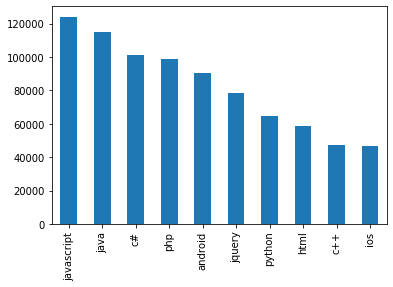

In [40]:
# from 2008 to 2016 top 10 technologies
import matplotlib.pyplot as plt
tags['Tag'].value_counts()[:10].plot(kind='bar')
plt.show()

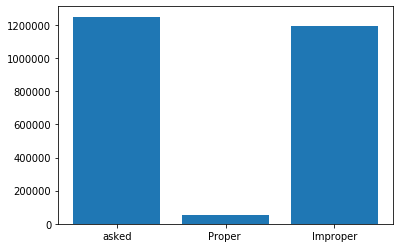

In [41]:
#Ratio of question asked and Following community guidlines and not following guide lines
asked = len(questions)
properguidelines = len(questions[-questions['ClosedDate'].isnull()])
notproper_guildlines = len(questions[questions['ClosedDate'].isnull()])
quest_labels = ['asked', 'Proper ', 'Improper']
quest_values = [asked, properguidelines, notproper_guildlines]
plt.bar(quest_labels, quest_values)
plt.show()

In [42]:
tags.isnull().sum()

Id     0
Tag    0
dtype: int64

In [43]:
#merge the tag, so that for each question we have the tag list in a single records and we are able to join with question or answer data set.
#this will help in sending notification
#please note this we need to save in data base.

merge_tags = tags.groupby('Id').Tag.agg([('Tag',', '.join)])
merge_tags = merge_tags.reset_index(level=0)

#rename merge_tag columns with appropriate name
merge_tags = merge_tags.rename(columns={'Id':'QuestionId','Tag':'QuestionTag'})
merge_tags

,QuestionId,QuestionTag
0,80,"flex, actionscript-3, air"
1,90,"svn, tortoisesvn, branch, branching-and-merging"
2,120,"sql, asp.net, sitemap"
3,180,"algorithm, language-agnostic, colors, color-space"
4,260,"c#, .net, scripting, compiler-construction"
...,...,...
1264209,40143210,"php, .htaccess"
1264210,40143300,google-bigquery
1264211,40143340,"android, android-studio"
1264212,40143360,"javascript, vue.js"


## Find the frequent tags for which question are asked is not followed the proper guideline. And user need to take care of this type of question.
## Conclusion we can give user suggestion/example that these are questions which are not followed the proper guildlines to please check to get your query ressolved quickly

In [44]:
#merge questions with merge tags
#questions
all_ques_with_merge_tags = pd.merge(questions, merge_tags, how='inner', left_on='Id', right_on='QuestionId')
all_ques_with_merge_tags[-all_ques_with_merge_tags['ClosedDate'].isnull()]

,Id,OwnerUserId,CreationDate,ClosedDate,QuestionId,QuestionTag
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,90,"svn, tortoisesvn, branch, branching-and-merging"
6,470,71,2008-08-02 15:11:47+00:00,2016-03-26 05:23:29+00:00,470,".net, web-services"
27,2540,136,2008-08-05 16:30:37+00:00,2014-04-03 15:36:28+00:00,2540,"c, architecture, data-structures"
29,2630,17,2008-08-05 18:01:32+00:00,2012-02-22 01:58:23+00:00,2630,"powershell, cmdlets"
35,2970,58,2008-08-05 23:55:25+00:00,2012-03-06 03:17:01+00:00,2970,"security, cracking, hijacked"
...,...,...,...,...,...,...
1249692,40141810,7044612,2016-10-19 21:29:05+00:00,2016-10-19 21:41:54+00:00,40141810,"operating-system, system"
1249721,40142370,7044756,2016-10-19 22:12:46+00:00,2016-10-19 22:17:45+00:00,40142370,c
1249724,40142450,6247467,2016-10-19 22:19:45+00:00,2016-10-19 23:06:30+00:00,40142450,"c#, multithreading, events"
1249731,40142600,7044841,2016-10-19 22:33:00+00:00,2016-10-19 22:34:48+00:00,40142600,python


## We can plot line graph to show the how top 4 are growing with year passes to find out which jobs needs to be posted and scope in future

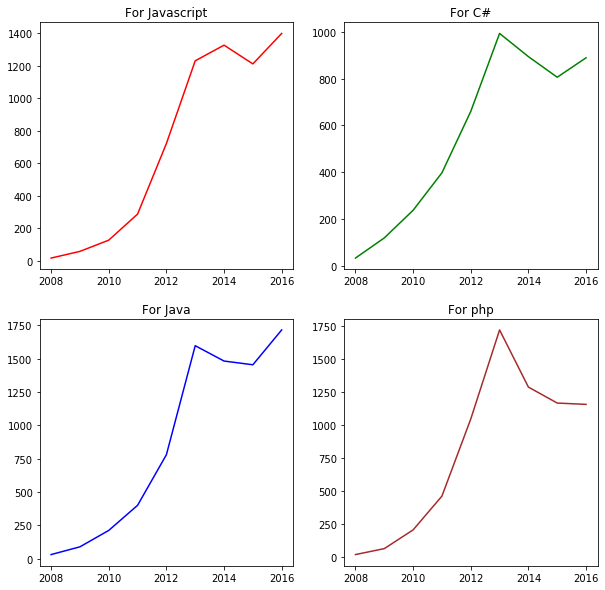

In [45]:
# Not required as we have merged to clean memory
all_ques_with_merge_tags = None
#remove the questions which have not followed the proper guide lines as tag may be incorrect.
all_ques_with_tags = pd.merge(questions, tags, how='inner', left_on='Id', right_on='Id')
all_ques_with_tags = all_ques_with_tags[-all_ques_with_tags['ClosedDate'].isnull()]
all_ques_with_tags['year'] = all_ques_with_tags['CreationDate'].apply(lambda x: x.year)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

b = all_ques_with_tags[all_ques_with_tags['Tag']=='javascript'].groupby(['year'], as_index=False).count()
axs[0, 0].plot(b['year'],b['Id'], color='red')
axs[0, 0].set_title('For Javascript')

b = all_ques_with_tags[all_ques_with_tags['Tag']=='java'].groupby(['year'], as_index=False).count()
axs[1, 0].plot(b['year'],b['Id'], color='blue')
axs[1, 0].set_title('For Java')

b = all_ques_with_tags[all_ques_with_tags['Tag']=='c#'].groupby(['year'], as_index=False).count()
axs[0, 1].plot(b['year'],b['Id'], color='green')
axs[0, 1].set_title('For C#')

b = all_ques_with_tags[all_ques_with_tags['Tag']=='php'].groupby(['year'], as_index=False).count()
axs[1, 1].plot(b['year'],b['Id'], color='brown')
axs[1, 1].set_title('For php')
plt.show()

## From above we can get that Javascript demand is increasing with year but php was once on peak but now usage are becoming less as user are asking less question

In [46]:
# Extract question id and Tag for data science tag only
data_science_tags = tags[(tags['Tag'] == 'python')|
                         (tags['Tag'] == 'r')|
                         (tags['Tag'] == 'matlab')|
                         (tags['Tag'] == 'sas')|
                         (tags['Tag'] == 'excel')|
                         (tags['Tag'] == 'sql')] 


In [47]:
#rename merge_tag columns with appropriate name
data_science_merge_tags = data_science_tags.groupby('Id').Tag.agg([('Tag',', '.join)])
data_science_merge_tags = data_science_merge_tags.reset_index(level=0)

data_science_merge_tags = data_science_merge_tags.rename(columns={'Id':'QuestionId','Tag':'QuestionTag'})
data_science_merge_tags

,QuestionId,QuestionTag
0,120,sql
1,1970,sql
2,2120,sql
3,2840,sql
4,4110,sql
...,...,...
132070,40142550,sql
132071,40142600,python
132072,40142840,python
132073,40142860,excel


In [48]:
# merge 'data_science_merge_tags' dataset with 'answers' dataset to get only relevant answers of the questions related to data science only
answer_datascience_tag = pd.merge(answers, data_science_merge_tags, how='inner', left_on=['ParentId'], right_on=['QuestionId'])
answer_datascience_tag = answer_datascience_tag.drop(axis=1, columns=['ParentId'])
answer_datascience_tag

,OwnerUserId,CreationDate,Score,QuestionId,QuestionTag
0,269,2008-08-05 06:43:30+00:00,3,1970,sql
1,277,2008-08-06 14:26:08+00:00,5,1970,sql
2,1081,2008-09-12 15:39:39+00:00,2,1970,sql
3,11116,2008-09-16 05:43:22+00:00,4,1970,sql
4,13860,2008-09-16 22:00:49+00:00,2,1970,sql
...,...,...,...,...,...
215056,1951885,2016-10-19 23:14:50+00:00,0,40142860,excel
215057,6179537,2016-10-19 23:35:30+00:00,0,40137500,matlab
215058,1491895,2016-10-19 23:38:17+00:00,5,40143190,python
215059,333403,2016-10-19 23:42:35+00:00,0,40143190,python


In [49]:
#Rename columns with appropriate names
answer_datascience_tag = answer_datascience_tag.rename(columns={'OwnerUserId':'AnswerOwnerUserId',
                            'CreationDate':'AnswerDate',
                            'Score':'AnswerScore'
                           })


In [50]:
#clear the memory of answers data set as it is not required
answers = ""

In [51]:

#merge with questions
answer_datascience_tag = pd.merge(answer_datascience_tag, questions, left_on=['QuestionId'], right_on=['Id'])
answer_datascience_tag

,AnswerOwnerUserId,AnswerDate,AnswerScore,QuestionId,QuestionTag,Id,OwnerUserId,CreationDate,ClosedDate
0,269,2008-08-05 06:43:30+00:00,3,1970,sql,1970,116,2008-08-05 06:39:31+00:00,NaT
1,277,2008-08-06 14:26:08+00:00,5,1970,sql,1970,116,2008-08-05 06:39:31+00:00,NaT
2,1081,2008-09-12 15:39:39+00:00,2,1970,sql,1970,116,2008-08-05 06:39:31+00:00,NaT
3,11116,2008-09-16 05:43:22+00:00,4,1970,sql,1970,116,2008-08-05 06:39:31+00:00,NaT
4,13860,2008-09-16 22:00:49+00:00,2,1970,sql,1970,116,2008-08-05 06:39:31+00:00,NaT
...,...,...,...,...,...,...,...,...,...
212128,1951885,2016-10-19 23:14:50+00:00,0,40142860,excel,40142860,7044919,2016-10-19 23:01:07+00:00,NaT
212129,6179537,2016-10-19 23:35:30+00:00,0,40137500,matlab,40137500,6552294,2016-10-19 17:02:23+00:00,NaT
212130,1491895,2016-10-19 23:38:17+00:00,5,40143190,python,40143190,333403,2016-10-19 23:36:01+00:00,NaT
212131,333403,2016-10-19 23:42:35+00:00,0,40143190,python,40143190,333403,2016-10-19 23:36:01+00:00,NaT


In [52]:
#rename columns to their appropriate name
answer_datascience_tag = answer_datascience_tag.drop(columns=['Id'])
answer_datascience_tag = answer_datascience_tag.rename(columns={
                           'OwnerUserId':'QuestionOwnerUserId',
                           'CreationDate':'QuestionDate',
                           'ClosedDate':'AcceptedDate'                          
                          })
answer_datascience_tag

,AnswerOwnerUserId,AnswerDate,AnswerScore,QuestionId,QuestionTag,QuestionOwnerUserId,QuestionDate,AcceptedDate
0,269,2008-08-05 06:43:30+00:00,3,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
1,277,2008-08-06 14:26:08+00:00,5,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
2,1081,2008-09-12 15:39:39+00:00,2,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
3,11116,2008-09-16 05:43:22+00:00,4,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
4,13860,2008-09-16 22:00:49+00:00,2,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
...,...,...,...,...,...,...,...,...
212128,1951885,2016-10-19 23:14:50+00:00,0,40142860,excel,7044919,2016-10-19 23:01:07+00:00,NaT
212129,6179537,2016-10-19 23:35:30+00:00,0,40137500,matlab,6552294,2016-10-19 17:02:23+00:00,NaT
212130,1491895,2016-10-19 23:38:17+00:00,5,40143190,python,333403,2016-10-19 23:36:01+00:00,NaT
212131,333403,2016-10-19 23:42:35+00:00,0,40143190,python,333403,2016-10-19 23:36:01+00:00,NaT


# Objective 1
### Find the average resolve time of the question for data science.
### Explanation: As question were answered by many user, we need to consider the date on which first answer is provided

In [53]:

avg_ans_time = answer_datascience_tag.groupby('QuestionOwnerUserId', as_index=False)[['QuestionDate','AnswerDate','QuestionTag']].min()

In [54]:
#Find the duration in hour to get the expected time for question to be answered

avg_ans_time['Estimated_Time_inHr'] = (avg_ans_time['AnswerDate'] - avg_ans_time['QuestionDate'] ) / np.timedelta64(1, 'h')

In [55]:
#Answer can't be given before the question asked, so delete those records

avg_ans_time[avg_ans_time['AnswerDate'] < avg_ans_time['QuestionDate']]

,QuestionOwnerUserId,QuestionDate,AnswerDate,QuestionTag,Estimated_Time_inHr
5819,231656,2009-12-14 23:09:35+00:00,2009-12-14 21:54:31+00:00,python,-1.251111
13504,601192,2011-02-03 09:44:03+00:00,2011-02-03 08:52:15+00:00,excel,-0.863333
13685,610178,2011-02-14 04:13:55+00:00,2011-02-13 22:11:07+00:00,sql,-6.046667
38541,2061873,2013-02-13 18:48:57+00:00,2013-02-13 17:49:28+00:00,excel,-0.991389


In [56]:
#drop invalid records
avg_ans_time = avg_ans_time[-(avg_ans_time['AnswerDate'] < avg_ans_time['QuestionDate'])]

In [57]:
#We can see there is huge difference between mean and 50%, so there must be outliers
avg_ans_time.describe()


,QuestionOwnerUserId,Estimated_Time_inHr
count,8.486800e+04,84868.000000
mean,2.659543e+06,171.922100
std,1.891986e+06,1381.528443
min,2.500000e+01,0.000000
25%,1.025590e+06,0.103056
50%,2.347431e+06,0.302222
75%,4.117390e+06,1.608056
max,7.046594e+06,49005.662778


In [58]:
# let us find  outlier which is we need to remove
# Check for the outlier where Estimated hours in greater than 1000
avg_ans_time[avg_ans_time['Estimated_Time_inHr'] > 1000]


,QuestionOwnerUserId,QuestionDate,AnswerDate,QuestionTag,Estimated_Time_inHr
5,61,2009-04-24 23:45:17+00:00,2009-08-17 11:05:42+00:00,python,2747.340278
6,83,2008-08-01 15:50:08+00:00,2008-09-23 22:41:11+00:00,sql,1278.850833
64,765,2012-06-19 22:59:01+00:00,2013-01-08 04:49:31+00:00,python,4853.841667
97,1431,2015-01-29 20:46:59+00:00,2015-04-15 22:52:21+00:00,python,1826.089444
141,2136,2015-01-22 05:10:19+00:00,2015-03-23 15:47:40+00:00,r,1450.622500
...,...,...,...,...,...
83010,6534415,2016-06-30 16:10:08+00:00,2016-09-30 19:36:56+00:00,python,2211.446667
83064,6542028,2016-07-19 03:45:29+00:00,2016-09-17 12:57:24+00:00,python,1449.198611
83265,6583276,2016-08-08 11:33:57+00:00,2016-10-02 12:22:13+00:00,python,1320.804444
83651,6664506,2016-08-01 18:25:19+00:00,2016-09-21 15:43:36+00:00,sql,1221.304722


In [59]:
len(avg_ans_time)

84868

In [60]:
# We can see count is less for the outliers to remove them 
avg_ans_time = avg_ans_time[-(avg_ans_time['Estimated_Time_inHr'] > 1000)]

In [61]:
avg_ans_time.describe()
#From here we can see the the average ressolve time is approx 13 hour if we check the whole stack over flow

,QuestionOwnerUserId,Estimated_Time_inHr
count,8.260400e+04,82604.000000
mean,2.671614e+06,13.487541
std,1.897396e+06,71.862897
min,2.500000e+01,0.000000
25%,1.031588e+06,0.100556
50%,2.362372e+06,0.282222
75%,4.139248e+06,1.330069
max,7.046594e+06,999.483889


In [62]:
# Extract the mean portion later we will insert in Db -- This is for Data Science tag
avg_ans_time.describe()['Estimated_Time_inHr'].loc['mean']

13.487541096341818

In [63]:
# Extract the 50% portion later we will insert in Db -- This is for Data Science tag
avg_ans_time.describe()['Estimated_Time_inHr'].loc['50%']

0.2822222222222222

# Conclusion of Objective 1
## Average time of answer is 13 hrs but 50% is near 0.3 meaning answer will available in very short time. 
## These two thing we will store in database

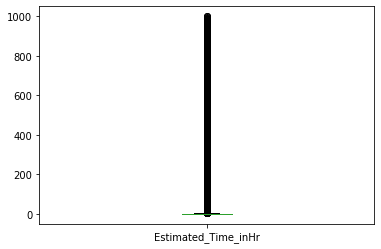

In [64]:
avg_ans_time['Estimated_Time_inHr'].plot(kind='box')
plt.show()

In [65]:
answer_datascience_tag['QuestionTag'].value_counts()

python                101819
sql                    66030
r                      20313
excel                  12967
matlab                  7995
sas                      863
python, sql              523
python, excel            404
python, matlab           260
sql, excel               256
python, r                224
sql, sas                 106
r, excel                  90
sql, r                    74
excel, matlab             56
r, matlab                 50
r, sas                    31
excel, sas                17
python, r, excel          10
python, r, matlab          9
python, sas                7
sql, matlab                6
sql, r, excel              5
python, sql, excel         5
excel, r                   3
sql, excel, sas            3
python, sql, r             2
r, python                  1
sql, r, sas                1
python, excel, r           1
sql, excel, matlab         1
r, excel, matlab           1
Name: QuestionTag, dtype: int64

In [66]:
answer_datascience_tag

,AnswerOwnerUserId,AnswerDate,AnswerScore,QuestionId,QuestionTag,QuestionOwnerUserId,QuestionDate,AcceptedDate
0,269,2008-08-05 06:43:30+00:00,3,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
1,277,2008-08-06 14:26:08+00:00,5,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
2,1081,2008-09-12 15:39:39+00:00,2,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
3,11116,2008-09-16 05:43:22+00:00,4,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
4,13860,2008-09-16 22:00:49+00:00,2,1970,sql,116,2008-08-05 06:39:31+00:00,NaT
...,...,...,...,...,...,...,...,...
212128,1951885,2016-10-19 23:14:50+00:00,0,40142860,excel,7044919,2016-10-19 23:01:07+00:00,NaT
212129,6179537,2016-10-19 23:35:30+00:00,0,40137500,matlab,6552294,2016-10-19 17:02:23+00:00,NaT
212130,1491895,2016-10-19 23:38:17+00:00,5,40143190,python,333403,2016-10-19 23:36:01+00:00,NaT
212131,333403,2016-10-19 23:42:35+00:00,0,40143190,python,333403,2016-10-19 23:36:01+00:00,NaT


# Objective 2
### Send Notification to relavant users. Below is the user id of those users

In [67]:
# Need to send notification to all users whose reputation is greater than 0
count = 0
user_id_to_notify = list(answer_datascience_tag['AnswerOwnerUserId'].unique())
type(user_id_to_notify)
user_id_to_notify


[269,
 277,
 1081,
 11116,
 13860,
 1167846,
 49166,
 383,
 1537,
 561339,
 313421,
 932224,
 3733733,
 4300786,
 36,
 1219,
 700,
 12096,
 57120,
 571,
 172,
 116,
 419,
 71,
 341,
 431,
 58,
 91,
 380,
 1016,
 1483,
 1249,
 5552,
 521799,
 267,
 414,
 1343,
 825,
 11521,
 333532,
 206484,
 838993,
 990,
 5,
 2586,
 3682,
 3743,
 3893,
 15136,
 17174,
 1367900,
 1057,
 2288743,
 874188,
 46,
 792,
 315,
 740,
 51,
 5719882,
 1975282,
 1965,
 1538,
 332,
 11410,
 72821,
 1293,
 794,
 2199,
 1349,
 225,
 1453,
 1709,
 2384,
 1690,
 1414,
 905,
 287311,
 2567,
 2758,
 350,
 2470,
 276311,
 2187273,
 4598660,
 2078245,
 41211,
 1818,
 2929,
 1737192,
 2785,
 2385,
 2983,
 592,
 4280,
 10624,
 2333663,
 1638,
 2147,
 720,
 1455,
 121718,
 3280431,
 1862,
 1060,
 493,
 615,
 1196,
 1123,
 2590,
 2849,
 1188,
 56,
 1821,
 3043,
 520440,
 881951,
 936824,
 1302822,
 1486677,
 1768911,
 1773950,
 1796141,
 2206467,
 1966824,
 2064007,
 2082012,
 2388598,
 2772462,
 3035367,
 3454959,
 2153499,

In [68]:
#save those user in database with their details so that based upon the reputation they can send notification
#for userid in user_id_to_notify:
user_notif_dtls = users[(users['id'].isin(user_id_to_notify)) & (users['reputation'] >= 10)]


In [69]:
user_notif_dtls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67943 entries, 0 to 1990474
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            67943 non-null  int64 
 1   display_name  67943 non-null  object
 2   reputation    67943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


# Objective 3
# Suggestion/recommendation for quick ressolve

### 1. After observing the below, it is better to tag the question correctly so that it will go to correct user

In [70]:
answer_datascience_tag['QuestionTag'].value_counts()

python                101819
sql                    66030
r                      20313
excel                  12967
matlab                  7995
sas                      863
python, sql              523
python, excel            404
python, matlab           260
sql, excel               256
python, r                224
sql, sas                 106
r, excel                  90
sql, r                    74
excel, matlab             56
r, matlab                 50
r, sas                    31
excel, sas                17
python, r, excel          10
python, r, matlab          9
python, sas                7
sql, matlab                6
sql, r, excel              5
python, sql, excel         5
excel, r                   3
sql, excel, sas            3
python, sql, r             2
r, python                  1
sql, r, sas                1
python, excel, r           1
sql, excel, matlab         1
r, excel, matlab           1
Name: QuestionTag, dtype: int64

## 2. If urgent, user can directly connect to the user who answered most for a particular tagging
### Taking example of python

In [71]:
ans_user_id = list(answer_datascience_tag[answer_datascience_tag['QuestionTag'] == 'python']['AnswerOwnerUserId'])
users[users['id'].isin(ans_user_id)].sort_values(by=['reputation'], ascending=False)

,id,display_name,reputation
110999,22656,Jon Skeet,1128126
35238,6309,VonC,888089
69941,157882,BalusC,884381
168856,100297,Martijn Pieters,756582
407215,157247,T.J. Crowder,732984
...,...,...,...
1888506,5568206,Mohd,1
464732,300556,Pubudu Gokarella,1
1551742,3907162,arnaud405,1
1688816,3547377,user3547377,1


## SAVING STARTED TO DB
1. avg_ans_time.describe()
2. user_notif_dtls
3. Recomendation to ressolve it quickly
4. Top 10 trending tech questions with total count

In [72]:
import mysql.connector
dbc = mysql.connector.connect(
    host = "db-stackoverflow.ctmm33ymj13j.us-east-1.rds.amazonaws.com",
    user = 'admin',
    passwd='password',
    port = 3306,
    db = 'dbstackoverflow',
)

In [73]:
TABLES = {}
TABLES['user_notif_dtls'] = (
    "CREATE TABLE `user_notif_dtls` (\
      `user_id` int(11) NOT NULL,\
      `user_name` varchar(100) NOT NULL,\
      `reputation` int(11),\
      PRIMARY KEY (`user_id`)\
    ) ENGINE=InnoDB")

TABLES['avg_time'] = (
    "CREATE TABLE `avg_time` (\
      `question_id` int(11) NOT NULL AUTO_INCREMENT,\
      `question_tag` varchar(200) NOT NULL,\
      `avg_estimated_hr` FLOAT NOT NULL,\
      `earliest_response_time_hr` FLOAT NOT NULL,\
      PRIMARY KEY (`question_id`)\
    ) ENGINE=InnoDB")

TABLES['trending_tech'] = (
    "CREATE TABLE `trending_tech` (\
      `trending_tech_id` int(11) NOT NULL AUTO_INCREMENT,\
      `tech_name` varchar(100) NOT NULL,\
      `no_of_questions` int(11),\
      PRIMARY KEY (`trending_tech_id`)\
    ) ENGINE=InnoDB")
TABLES

{'user_notif_dtls': 'CREATE TABLE `user_notif_dtls` (      `user_id` int(11) NOT NULL,      `user_name` varchar(100) NOT NULL,      `reputation` int(11),      PRIMARY KEY (`user_id`)    ) ENGINE=InnoDB',
 'avg_time': 'CREATE TABLE `avg_time` (      `question_id` int(11) NOT NULL AUTO_INCREMENT,      `question_tag` varchar(200) NOT NULL,      `avg_estimated_hr` FLOAT NOT NULL,      `earliest_response_time_hr` FLOAT NOT NULL,      PRIMARY KEY (`question_id`)    ) ENGINE=InnoDB',
 'trending_tech': 'CREATE TABLE `trending_tech` (      `trending_tech_id` int(11) NOT NULL AUTO_INCREMENT,      `tech_name` varchar(100) NOT NULL,      `no_of_questions` int(11),      PRIMARY KEY (`trending_tech_id`)    ) ENGINE=InnoDB'}

## Table creation

In [74]:
# Creating tables
cursor = dbc.cursor()

for table_name in TABLES:
    table_description = TABLES[table_name]
    print("Creating table {}.".format(table_name))
    cursor.execute(table_description)
    
cursor.close()


Creating table user_notif_dtls.
Creating table avg_time.
Creating table trending_tech.


True

### Insert user details to whom the notification should go

In [75]:
# Inserting user to whom the notification should go
query = ("INSERT INTO user_notif_dtls "
                       "(user_id, user_name, reputation) "
                       "VALUES (%s, %s, %s)")

no_of_record_inserted = 0
cursor = dbc.cursor()
for index, user in user_notif_dtls.iterrows():
    user_notif_data = (user['id'], user['display_name'], user['reputation'])
    #user_notif_data = (1, 'user', 0)
    cursor.execute(query, user_notif_data)
    no_of_record_inserted = no_of_record_inserted + 1

dbc.commit()
cursor.close()

print("No of Record inserted {}".format(no_of_record_inserted))

No of Record inserted 67943


### Inserting Question Tag, Average and earliest reponse

In [76]:
# Inserting Question Tag, Average and earliest reponse
cursor = dbc.cursor()

query = ("INSERT INTO avg_time "
           "(question_tag, avg_estimated_hr, earliest_response_time_hr) "
            "VALUES (%s, %s, %s)")

avg_time_data = ("('python', 'r', 'matlab', 'sas', 'excel', 'sql')",
                 float(avg_ans_time.describe()['Estimated_Time_inHr'].loc['mean']),
                 float(avg_ans_time.describe()['Estimated_Time_inHr'].loc['50%'])
                )
cursor.execute(query, avg_time_data)
dbc.commit()
cursor.close()

True

### Insert the top 10 tech softwares on which most queston asked

In [77]:
# Inserting user to whom the notification should go
cursor = dbc.cursor()
query = ("INSERT INTO trending_tech "
                       "(tech_name, no_of_questions) "
                       "VALUES (%s, %s)")

no_of_record_inserted = 0

    
for tech_name, count in tags['Tag'].value_counts()[0:10].iteritems():
    #user_notif_data = (user['id'], user['display_name'], user['reputation'])
    values = (tech_name, count)
    cursor.execute(query, values)
    no_of_record_inserted = no_of_record_inserted + 1

dbc.commit()
cursor.close()

print("No of Record inserted {}".format(no_of_record_inserted))

No of Record inserted 10
